# Exploratory Data Analysis for Mergers and Acquisitions

# Importing the Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 1: Read the csv data

- Observer the number of columns
- Look at the dtype of each row 
- Count the number of data
- Check for the null values 

In [ ]:
df = pd.read_csv("mergers and acquisitions.csv")

In [ ]:
df.head()

,date,acquried_company,acquring_company,business,country,price
0,"February 12, 2001",Dejavue,Google Groups,Usenet,United States,—
1,"September 20, 2001",Outride,Google Personalized Search,Web search engine,United States,—
2,February 2003,Pyra Labs,Blogger,Weblog software,United States,—
3,April 2003,Neotonic Software,"Google Groups, Gmail",Customer relationship management,United States,—
4,April 2003,Applied Semantics,"AdSense, AdWords",Online advertising,United States,"$102,000,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              245 non-null    object
 1   acquried_company  245 non-null    object
 2   acquring_company  239 non-null    object
 3   business          245 non-null    object
 4   country           245 non-null    object
 5   price             245 non-null    object
dtypes: object(6)
memory usage: 11.6+ KB


In [ ]:
df.describe()

,date,acquried_company,acquring_company,business,country,price
count,245,245,239,245,245,245
unique,231,245,112,204,24,41
top,"May 7, 2014",Dejavue,Google Cloud Platform,Online advertising,United States,—
freq,3,1,22,6,179,189


#### Observation
- There are total 245 rows in each columns
- The number of rows is 6
- Acquring_company has 6 null data
- The dtypes of all the columns is object

###  Step 2: Data Cleaning
- We need to remove special characters from price column.
- Convert date column to standard format
- Remove the null value from acquring_company
- Split day, month, and year column
- Replace '-' with np.nan

In [ ]:
df['price'] = df['price'].replace("—", np.nan)

In [ ]:
df.acquring_company.isna().sum()

6

Helping function to remove special characters from price column

In [ ]:
def remove_sign(x):
    if x is not np.nan:
        x = x.split("$")[1]
    return x
def remove_comma(x):
    if x is not np.nan:
        x = str(x).replace(",","")
    return x

def to_integer(x):
    if x is not np.nan:
        x = int(x)
    return x 

In [ ]:
df.price = df.price.apply(lambda x: to_integer(remove_comma(remove_sign(x))))

Converting date in standard format

In [ ]:
df['date'] = pd.to_datetime(df.date)

Splitting the day, month and year columns

In [ ]:
df['day'] = df.date.apply(lambda x: str(x).split('-')[-1])
df['month'] = df.date.apply(lambda x: int(str(x).split('-')[1]))
df['year'] = df.date.apply(lambda x: int(str(x).split('-')[0]))
df['day'] = df.day.apply(lambda x: int(x.split(" ")[0]))

In [ ]:
df = df[df['acquring_company'].notna()]

In [ ]:
df['country']= df['country'].replace("—", np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df[df['country'].notna()]

In [ ]:
df.head()

,date,acquried_company,acquring_company,business,country,price,day,month,year
0,2001-02-12,Dejavue,Google Groups,Usenet,United States,NaN,12,2,2001
1,2001-09-20,Outride,Google Personalized Search,Web search engine,United States,NaN,20,9,2001
2,2003-02-01,Pyra Labs,Blogger,Weblog software,United States,NaN,1,2,2003
3,2003-04-01,Neotonic Software,"Google Groups, Gmail",Customer relationship management,United States,NaN,1,4,2003
4,2003-04-01,Applied Semantics,"AdSense, AdWords",Online advertising,United States,102000000.0,1,4,2003


In [ ]:
df.acquring_company.isna().sum()

0

In [ ]:
def merge_google_company(x):
    if "Google" in str(x):
        x = "Google"
    return x

In [ ]:
df.acquring_company = df.acquring_company.apply(lambda x: merge_google_company(x))

### Step 3: Data Visualization

In [ ]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)

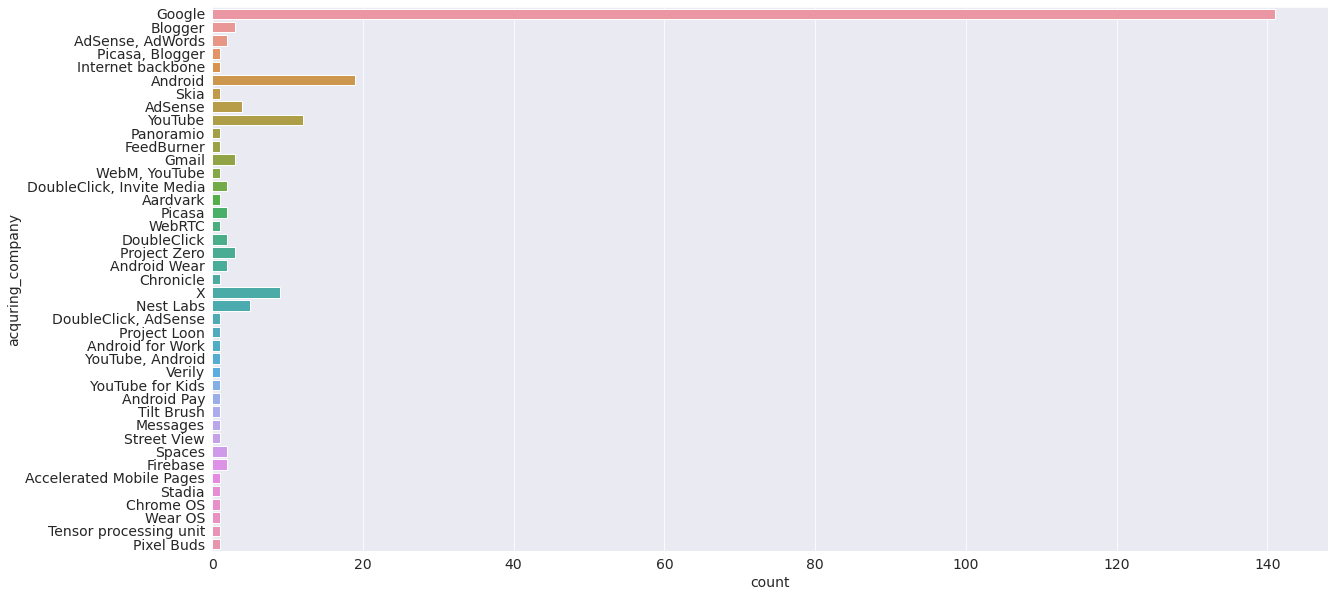

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(y="acquring_company",data=df);

The Google has merged with more than 140 companies in the span of 20 years

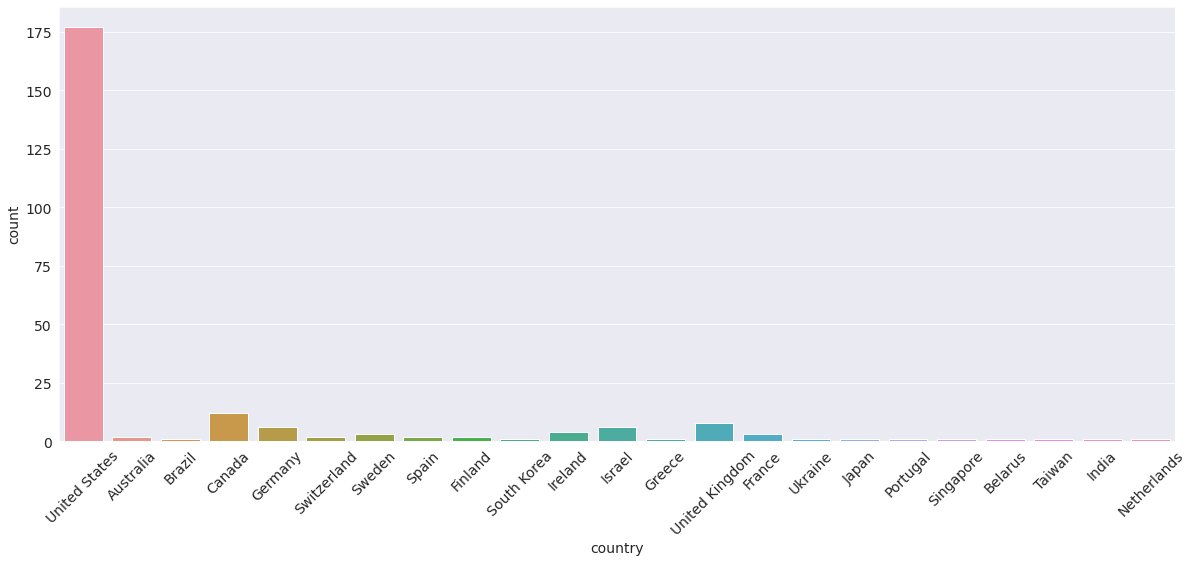

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x="country",data=df);
plt.xticks(rotation=45);

Here the United States is dominating. The reason behind this might be USA is strongest nation economically and tax might be low.

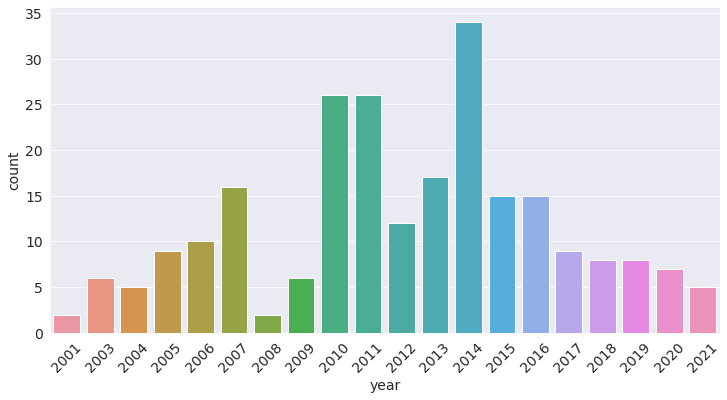

In [ ]:
sns.countplot(x="year",data=df)
plt.xticks(rotation=45);

2014 was the most active year followed by 2010 and 2011 